# **Binary Classification**

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


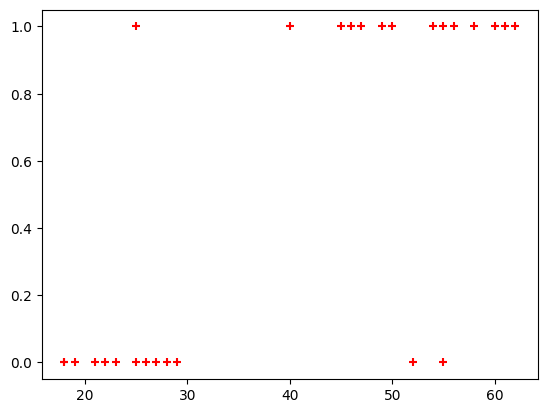

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [7]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [8]:
model.fit(x_train,y_train)

LogisticRegression()

In [9]:
model.predict(x_test)

array([1, 1, 1])

In [10]:
x_test

,age
17,58
6,55
15,55


In [11]:
model.score(x_test,y_test)

0.6666666666666666

In [12]:
model.predict_proba(x_test)

array([[0.02628094, 0.97371906],
       [0.04299218, 0.95700782],
       [0.04299218, 0.95700782]])

In [13]:
model.predict([[20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

# **MultiClasses Classification**

In [14]:
from sklearn.datasets import load_digits

In [15]:
load=load_digits()

In [16]:
dir(load)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [18]:
load.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

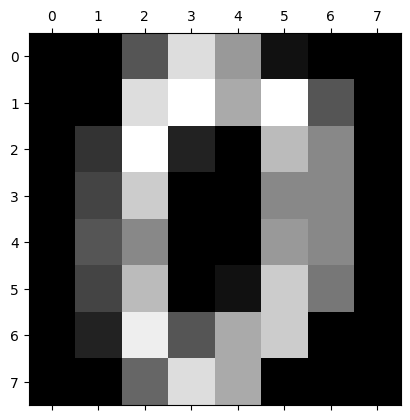

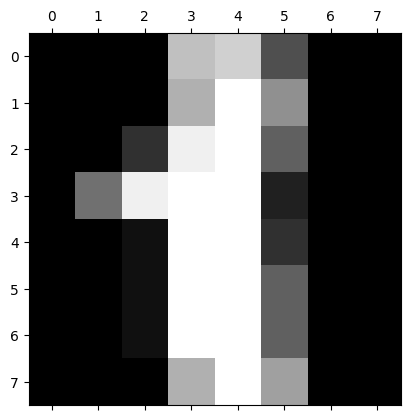

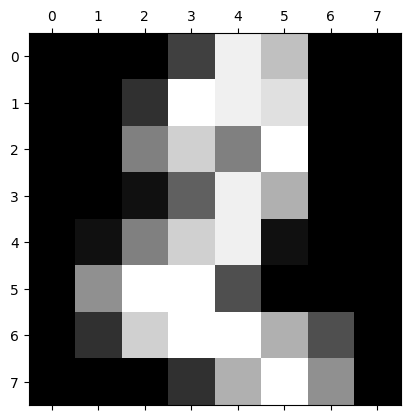

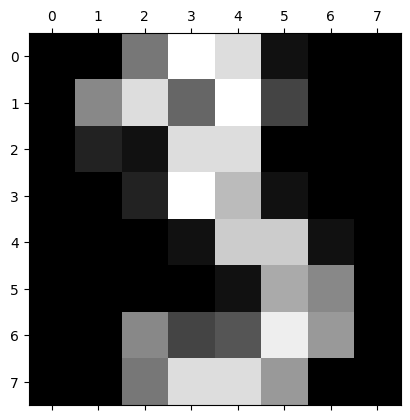

In [22]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
 plt.matshow(load.images[i])

In [23]:
load.target[0:5]

array([0, 1, 2, 3, 4])

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(load.data,load.target,test_size=0.3)

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [36]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

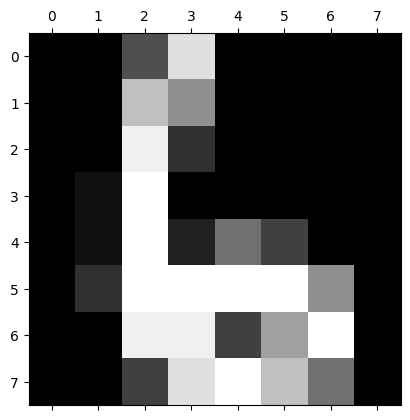

In [38]:
plt.matshow(load.images[67])

In [39]:
load.target[67]

6

In [40]:
model.predict([load.data[67]])

array([6])

In [41]:
model.score(x_test,y_test)

0.9592592592592593

In [42]:
y_predicted=model.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 65,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0, 51,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 46,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1, 43,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  3,  1,  0,  0,  1,  0,  0, 49,  2],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  3, 53]])

Text(95.72222222222221, 0.5, 'Truth')

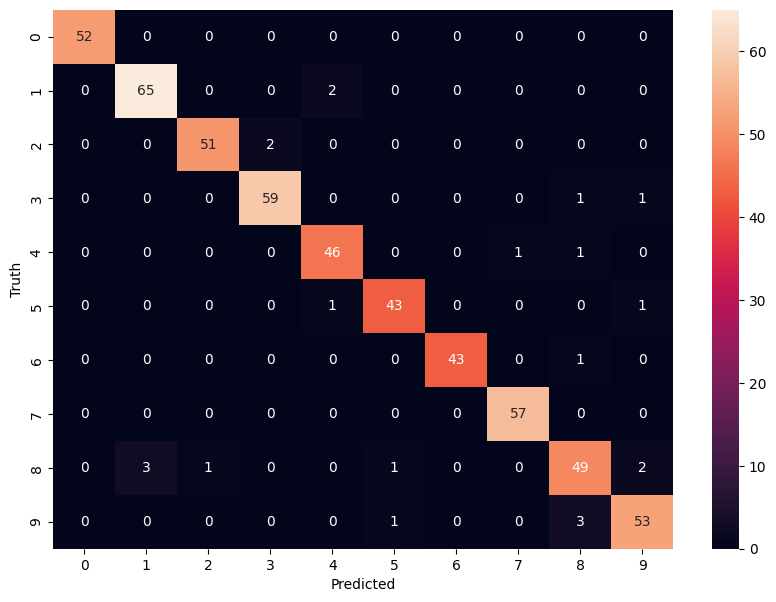

In [44]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
